# **Space X  Falcon 9 First Stage Landing Prediction**


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


* Perform exploratory Data Analysis and determine Training Labels
* Create a column for the class
* Standardize the data
* Split into training data and test data
* Find best Hyperparameter for SVM, Classification Trees and Logistic Regression
* Find the method performs best using test data

## Import Libraries and Define Auxiliary Functions


In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [3]:
data = pd.read_csv('data/falcon9_data_wrangle.csv')
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
X = pd.read_csv('data/falcon9_eda.csv')
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>.

In [5]:
y = data['Class'].to_numpy()

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code>.


In [6]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

## TASK  3


Perform train_test_split to split the data X and Y into training and test data. 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((72, 83), (18, 83), (72,), (18,))

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [9]:
parameters = {'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, parameters, cv=10)
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [10]:
print("Tuned Hyperparameters (best parameters): ",logreg_cv.best_params_)
print("Accuracy:",logreg_cv.best_score_)

Tuned Hyperparameters (best parameters):  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.8464285714285713


## TASK  5


Calculate the accuracy on the test data.


In [11]:
# Calculate accuracy on test data
accuracy_logreg = logreg_cv.score(X_test, y_test)
print("Accuracy on test data:", accuracy_logreg)

Accuracy on test data: 0.8333333333333334


Plot confusion matrix


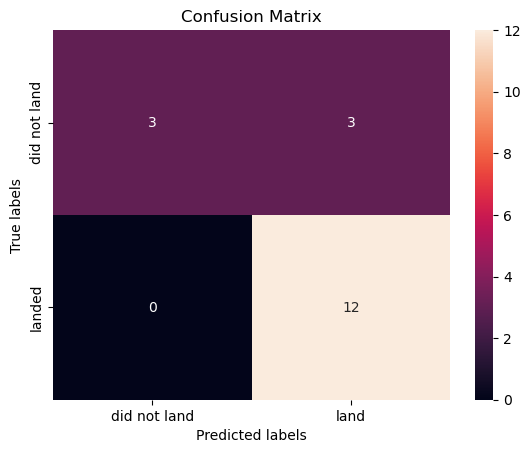

In [12]:
# Predict the labels for the test data
yhat_logreg = logreg_cv.predict(X_test)

# Plot confusion matrix
plot_confusion_matrix(y_test, yhat_logreg)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [13]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [14]:
print("Tuned Hyperparameters (best parameters): ",svm_cv.best_params_)
print("Accuracy:",svm_cv.best_score_)

Tuned Hyperparameters (best parameters):  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Accuracy: 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data.


In [15]:
# Calculate accuracy on test data
accuracy_svm = svm_cv.score(X_test, y_test)
print("Accuracy on test data:", accuracy_svm)

Accuracy on test data: 0.8333333333333334


Plot the confusion matrix


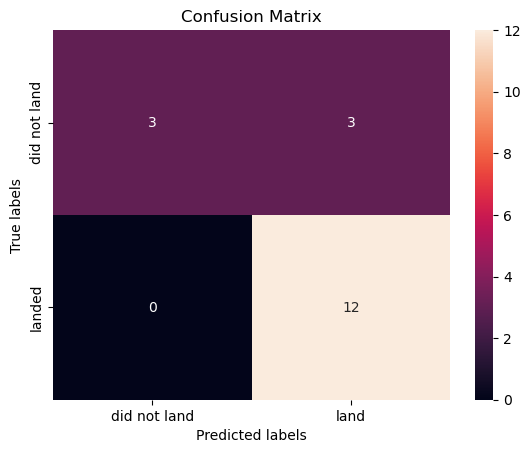

In [16]:
yhat_svm = svm_cv.predict(X_test)
plot_confusion_matrix(y_test, yhat_svm)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [17]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, y_train)

c:\Users\admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\admin\anaconda3\Lib\site-pac

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [18]:
print("Tuned Hyperparameters (best parameters): ",tree_cv.best_params_)
print("Accuracy:", tree_cv.best_score_)

Tuned Hyperparameters (best parameters):  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
Accuracy: 0.875


## TASK  9


Calculate the accuracy of tree_cv on the test data.


In [19]:
accuracy_tree = tree_cv.score(X_test, y_test)
print("Accuracy on test data:", accuracy_tree)

Accuracy on test data: 0.8888888888888888


Plot the confusion matrix


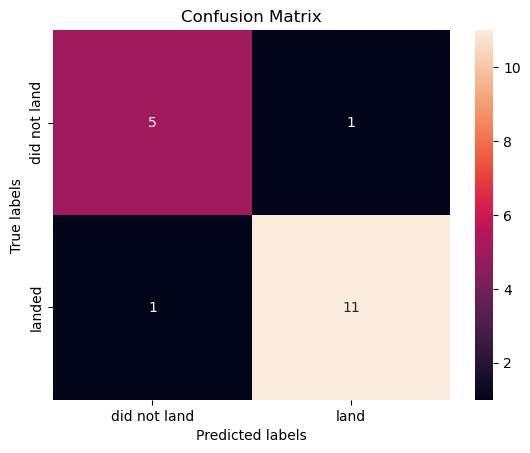

In [20]:
yhat_tree = tree_cv.predict(X_test)
plot_confusion_matrix(y_test, yhat_tree)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [21]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, y_train)

c:\Users\admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py", line 764, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 259, in predict
    probabil

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [22]:
print("Tuned Hyperparameters (best parameters):",knn_cv.best_params_)
print("Accuracy:",knn_cv.best_score_)

Tuned Hyperparameters (best parameters): {'algorithm': 'ball_tree', 'n_neighbors': 10, 'p': 1}
Accuracy: 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data.


In [23]:
accuracy_knn = knn_cv.score(X_test, y_test)
print("Accuracy on test data:", accuracy_knn)

Accuracy on test data: 0.8333333333333334


Plot the confusion matrix


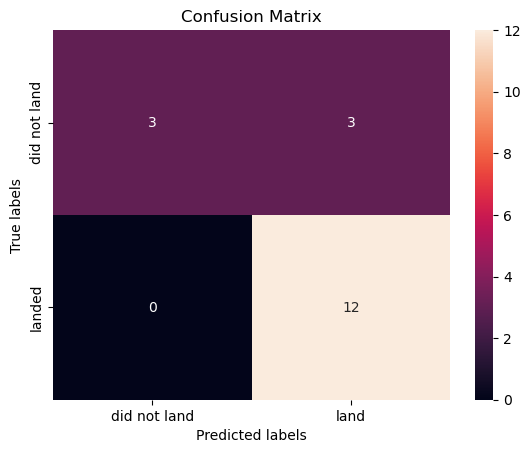

In [24]:
yhat_knn = knn_cv.predict(X_test)
plot_confusion_matrix(y_test, yhat_knn)

## TASK  12


Find the method performs best.


In [25]:
# Create a dictionary with method names, accuracies, and tuned hyperparameters
report_data = {
    'Classification Model': ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'K-Nearest Neighbors'],
    'Accuracy': [accuracy_logreg, accuracy_svm, accuracy_tree, accuracy_knn],
    'Tuned Hyperparameters': [logreg_cv.best_params_, svm_cv.best_params_, tree_cv.best_params_, knn_cv.best_params_]
}

# Create DataFrame
report_df = pd.DataFrame(report_data).sort_values(by='Accuracy', ascending=False)
report_df

,Classification Model,Accuracy,Tuned Hyperparameters
2,Decision Tree,0.888889,"{'criterion': 'entropy', 'max_depth': 10, 'max..."
0,Logistic Regression,0.833333,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}"
1,Support Vector Machine,0.833333,"{'C': 1.0, 'gamma': 0.03162277660168379, 'kern..."
3,K-Nearest Neighbors,0.833333,"{'algorithm': 'ball_tree', 'n_neighbors': 10, ..."


In [26]:
# List of accuracies
accuracies = [accuracy_logreg, accuracy_svm, accuracy_tree, accuracy_knn]

# Find the index of the method with the highest accuracy
best_method_index = np.argmax(accuracies)

# Print the best-performing method, its accuracy, and tuned hyperparameters
print("Best-performing Model:", report_df['Classification Model'][best_method_index])
print("Accuracy:", report_df['Accuracy'][best_method_index])
print("Tuned Hyperparameters:", report_df['Tuned Hyperparameters'][best_method_index])

Best-performing Model: Decision Tree
Accuracy: 0.8888888888888888
Tuned Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}


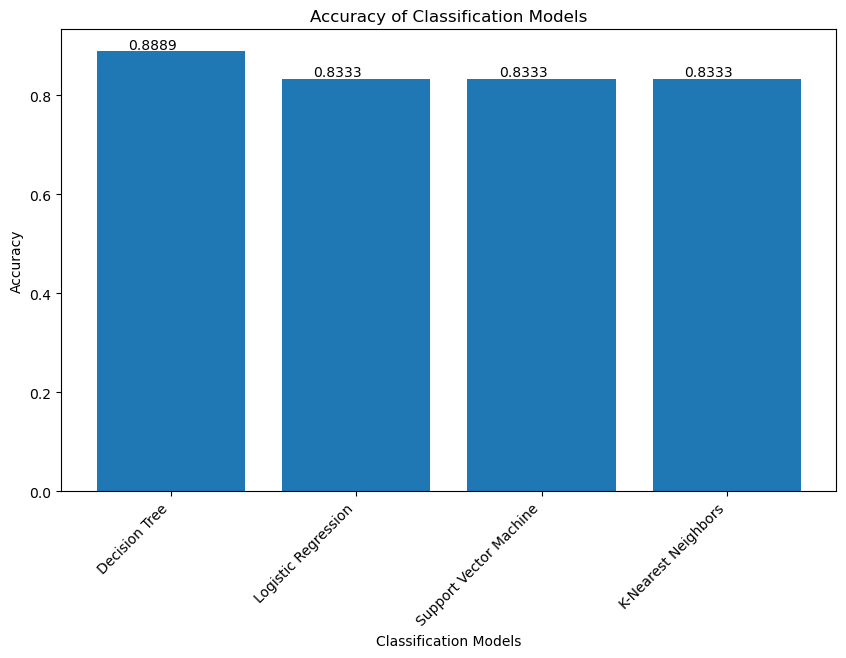

In [27]:
# Plotting the bar chart with accuracy annotations and automatic different colors
plt.figure(figsize=(10, 6))
bars = plt.bar(report_df['Classification Model'], report_df['Accuracy'])
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Classification Models')
plt.xticks(rotation=45, ha='right')

# Adding accuracy annotations on each bar
for bar, acc in zip(bars, report_df['Accuracy']):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height() + 0.005, f'{acc:.4f}', ha='center', color='black')

plt.show()